## 1.1.2. Ridge Regression and Classification

Ridge regularization은 계수의 크기에 패널티를 부과하여 최소제곱법의 과적합 문제를 해결하는 정규화 방법입니다.<br><br>
또한 L2 Regularization이라고도 부릅니다.<br><br>
Ridge regression은 최소제곱법(OLS)와 유사하나 '각 계수의 제곱을 합한 값'을 식에 포함하여 계수의 크기도 함께 최소화 하도록 만들었다는 차이가 있습니다.<br><br>
$ \min_{w}||X_w - y||_{2}^{2} + \alpha||w||_{2}^{2} $<br><br>
최소값을 구하는 것이 목적이므로 $\alpha$ 값이 커질 수록 $w$는 0으로 수렴할 것입니다.<br><br>
$w$값이 0으로 수렴한다면 아래의 그림과 같이 모델이 단순해지고 과적합을 방지할 수 있습니다.

![](img\\ridge.png)

### 1.1.2.1. Regression

In [12]:
from sklearn import linear_model
reg = linear_model.Ridge(alpha = .7)
reg.fit([[0,0], [0,0],[1,1]], [0, .1, 1])

Ridge(alpha=0.7)

In [13]:
reg.coef_

array([0.31147541, 0.31147541])

In [3]:
reg.intercept_

0.15901639344262297

### 1.1.2.2 Classification

Ridge regressor 분석기에는 변형된 분류기인 RidgeClassifier이 있습니다. 이 분류기는 먼저 binary target을 {-1,1} 로 변환한 다음 문제를 회귀 작업으로 처리하여 최적화 합니다.<br>
예측된 클래스는 regressor의 예측 부호에 해당합니다. 다중클래스 분류의 경우 문제는 다중 출력 회귀로 처리되고 예측된 클래스는 가장 높은 값을 가진 출력에 해당합니다.<br>

보다 전통적인 logistic 또는 hinge loss 대신 분류 모델에 맞추기 위해 Least Squares(최소제곱) loss를 사용하는 것이 의심스러워 보일 수 있습니다.<br>
그러나 실제로 이러한 모든 모델은 정확도 또는 정밀도, 재현율 측면에서 유사한 교차 검증 Score로 이어질 수 있는 반면,<br>
RidgeCladdifier에서 사용하는 Penalized Least Squares은 고유한 계산 성능 프로필을 가진 수치 솔버의 매우 다른 선택을 허용합니다.<br>

RidgeClassifier는 프로젝션 행렬 $(X^{T}X)^{-1}X^{T}$를 한번만 계산 하기 때문에 클래스 수가 많은 LogisticRegression보다 훨씬 빠를 수 있습니다.

**Plot Ridge coefficients as a function of the regularization**

이 예제는 estimator의 계소에서 공선성의 효과를 보여줍니다.

Ridge regression은 이 예에서 사용된 estimator입니다. 각 색상은 계수 벡터의 다른 특성을 나타내며 이는 regularization 매개변수의 함수로 표시됩니다.

이 예는 또한 조건이 매우 나쁜 행렬에 Ridge regression을 적용하는 것의 유용성을 보여줍니다.<br>
이러한 행렬의 경우 목표 변수가 약간 변경되어도 계산된 가중치가 크게 달라질 수 있습니다.<br>
이러한 경우 이 변동(Noise)을 줄이기 위해 특정 정규화($\alpha$)를 설정하는 것이 유용합니다.<br>

$\alpha$ 가 매우 크면 정규화 효과가 제곱 손실 함수를 지배하고 계수는 0이 되는 경향이 있습니다.<br>
경로의 끝에서 $\alpha$는 0을 향하고 솔루션은 일반적인 최소 제곱을 향하는 경향이 있으므로 계수는 큰 진동을 나타냅니다.<br>
실제로는 둘 사이의 균형이 유지되는 방식으로 알파를 조정할 필요가 있습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1.0 / (np.arange(1,11) + np.arange(0,10)[:, np.newaxis])
y = np.ones(10)

- Compute paths(계산 경로)

In [3]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

- Display result

In [14]:
plt.rcParams["figure.figsize"] = (10, 10)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.set_xlim()[::-1]) # rever axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

NameError: name 'plt' is not defined

**Classification of text documents using sparse features**

이 예제는 bag-of words 접근 방식을 사용하여 주제별로 문서를 분류하는데 sikit-learn을 사용하는 방법을 보여줍니다.<br>
scipy.sparse 해렬을 사용하여 기능을 저장하고 희소 행렬을 효율적으로 처리할 수 있는 다양한 분류기를 보여줍니다.<br>

이 예제에서 사용되는 dataset은 20개의 뉴스 그룹 dataset입니다.

- Configuration options for the analysis

In [8]:
# If True, we use 'HashingVectorizer', otherwise we use a 'TfidfVectorizer'
USE_HASHING = False

# Number of features used by 'HashingVectorizer'
N_FEATURES = 2**16

#Optional feature selection : either False, or an integer : the number of features to select
SELECT_CHI2 = False

- Load data from the training set

20개의 주제에 대한 약 18000개의 뉴스 그룹 게시물로 구성된 뉴스 그룹 dataset에서 데이터를 load 하겠습니다.

In [9]:
from sklearn.datasets import fetch_20newsgroups

categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]

data_train = fetch_20newsgroups(
    subset='train', categories=categories, shuffle=True, random_state=42
)

data_test = fetch_20newsgroups(
    subset='test', categories=categories, shuffle=True, random_state=42
)
print('data loaded')

# order of labels in 'target_names' can be different from 'categories
target_names = data_train.target_names

def size_mb(docs):
    return sum(len(s.encode('utf-8')) for s in docs) / 1e6

data_train_size_mb = size_mb(data_train.data)
data_test_size_mb = size_mb(data_test.data)

print(
    "%d documents - %0.3fMB (training set)" % (len(data_train.data), data_train_size_mb)
)
print("%d documents - %0.3fMB (test set)" % (len(data_test.data), data_test_size_mb))
print("%d categories" % len(target_names))

data loaded
2034 documents - 3.980MB (training set)
1353 documents - 2.867MB (test set)
4 categories


- Vectorize the Training and test data

split a training set and a test set

In [17]:
y_train, y_test = data_train.target, data_test.target

Extracting features from the training data using a sparse vectorizer
    -> 희소 벡터라이저를 사용하여 훈련 데이터에서 특징 추출

In [11]:
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

t0 = time()

if USE_HASHING:
    vectorizer = HashingVectorizer(
        stop_words='english', alternate_sign=False, n_features=N_FEATURES
    )
    X_train = vectorizer.transform(data_train.data)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
    X_train = vectorizer.fit_transform(data_train.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)

done in 0.357778s at 11.123MB/s
n_samples: 2034, n_features: 33809


Extracting features from the test data using the same vectorizer -> 동일한 벡터라이저를 사용하여 test dat에서 특징 추출

In [12]:
t0 = time()
X_test = vectorizer.transform(data_test.data)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)

done in 0.191575s at 14.968MB/s
n_samples: 1353, n_features: 33809


mapping from integer feature name to original token string

In [13]:
if USE_HASHING:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names_out()

keeping only the best features

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

if SELECT_CHI2:
    print("Extracting %d best features by a chi-squared test" % SELECT_CHI2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=SELECT_CHI2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names is not None:
        # keep selected feature names
        feature_names = feature_names[ch2.get_support()]
    print("done in %fs" % (time() - t0))
    print()

- Benchmark classifiers

먼저 벤치마킨 유틸리티를 정의합니다.

In [15]:
import numpy as np
from sklearn import metrics
from sklearn.utils.extmath import density


def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."


def benchmark(clf):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    print("classification report:")
    print(metrics.classification_report(y_test, pred, target_names=target_names))

    print("confusion matrix:")
    print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split("(")[0]
    return clf_descr, score, train_time, test_time

이제 15개의 서로 다른 분류 모델로 데이터 세트를 훈련 및 테스트하고 각 모델에 대한 성능 결과를 얻습니다.

In [18]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier


results = []
for clf, name in (
    (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
    (Perceptron(max_iter=50), "Perceptron"),
    (PassiveAggressiveClassifier(max_iter=50), "Passive-Aggressive"),
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print("=" * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

# Train SGD with Elastic Net penalty
print("=" * 80)
print("Elastic-Net penalty")
results.append(
    benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet"))
)

# Train NearestCentroid without threshold
print("=" * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print("=" * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.01)))
results.append(benchmark(BernoulliNB(alpha=0.01)))
results.append(benchmark(ComplementNB(alpha=0.1)))

print("=" * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(
    benchmark(
        Pipeline(
            [
                (
                    "feature_selection",
                    SelectFromModel(LinearSVC(penalty="l1", dual=False, tol=1e-3)),
                ),
                ("classification", LinearSVC(penalty="l2")),
            ]
        )
    )
)

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(solver='sag', tol=0.01)
train time: 0.102s
test time:  0.001s
accuracy:   0.897
dimensionality: 33809
density: 1.000000
top 10 keywords per class:
alt.atheism: osrhe atheist wingate god okcforum caltech islamic atheism keith...
comp.graphics: animation video looking card hi 3d thanks file image graphics
sci.space: dc flight shuttle launch pat moon sci orbit nasa space
talk.religion.misc: jesus mitre hudson morality biblical 2000 beast mr fbi ch...

classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.87      0.83      0.85       319
     comp.graphics       0.90      0.98      0.94       389
         sci.space       0.96      0.94      0.95       394
talk.religion.misc       0.83      0.78      0.80       251

          accuracy                           0.90      1353
         macro avg       0.89      0.

c:\Users\user\anaconda3\envs\deep\lib\site-packages\sklearn\linear_model\_ridge.py:730: UserWarning: "sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).
  '"sag" solver requires many iterations to fit '


test time:  0.140s
accuracy:   0.858
classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.78      0.90      0.84       319
     comp.graphics       0.89      0.89      0.89       389
         sci.space       0.90      0.91      0.90       394
talk.religion.misc       0.86      0.67      0.75       251

          accuracy                           0.86      1353
         macro avg       0.86      0.84      0.85      1353
      weighted avg       0.86      0.86      0.86      1353

confusion matrix:
[[287   3  11  18]
 [ 14 348  19   8]
 [  7  26 359   2]
 [ 59  13  12 167]]

Random forest
________________________________________________________________________________
Training: 
RandomForestClassifier()
train time: 0.854s
test time:  0.054s
accuracy:   0.840
classification report:
                    precision    recall  f1-score   support

       alt.atheism       0.86      0.74      0.80       319
     comp.graphics       0.80 

c:\Users\user\anaconda3\envs\deep\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\deep\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
c:\Users\user\anaconda3\envs\deep\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


- Add plots

막대 플롯은 각 분류기의 정확도, 훈련 시간(정규화) 및 테스트 시간(정규화)을 나타냅니다.

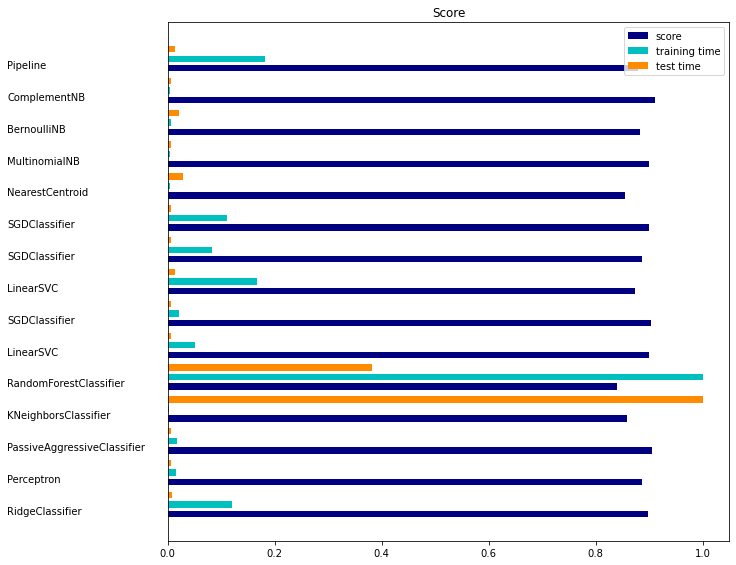

In [19]:
import matplotlib.pyplot as plt

indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, 0.2, label="score", color="navy")
plt.barh(indices + 0.3, training_time, 0.2, label="training time", color="c")
plt.barh(indices + 0.6, test_time, 0.2, label="test time", color="darkorange")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.05)

for i, c in zip(indices, clf_names):
    plt.text(-0.3, i, c)

plt.show()